<a href="https://colab.research.google.com/github/mohammedbasithpm964/Al-ML-Tasks-and-Projects/blob/main/Airlines_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset=pd.read_csv("/content/Invistico_Airline.csv")

In [4]:
dataset

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
129876,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,3,2,3,3,1,2,1,174,172.0,dissatisfied
129877,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,4,4,3,4,2,3,2,155,163.0,dissatisfied
129878,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,3,3,2,3,2,1,2,193,205.0,dissatisfied


In [5]:
# Step 1: Split columns by data type
object_cols = dataset.select_dtypes(include=['object'])
float_cols = dataset.select_dtypes(include=['float64'])
int_cols = dataset.select_dtypes(include=['int64'])

In [6]:
float_cols.mean()

,0
Arrival Delay in Minutes,15.091129


In [7]:
object_cols

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Female,Loyal Customer,Personal Travel,Eco,satisfied
1,Male,Loyal Customer,Personal Travel,Business,satisfied
2,Female,Loyal Customer,Personal Travel,Eco,satisfied
3,Female,Loyal Customer,Personal Travel,Eco,satisfied
4,Female,Loyal Customer,Personal Travel,Eco,satisfied
...,...,...,...,...,...
129875,Female,disloyal Customer,Personal Travel,Eco,satisfied
129876,Male,disloyal Customer,Personal Travel,Business,dissatisfied
129877,Male,disloyal Customer,Personal Travel,Eco,dissatisfied
129878,Male,disloyal Customer,Personal Travel,Eco,dissatisfied


In [8]:
float_cols

,Arrival Delay in Minutes
0,0.0
1,305.0
2,0.0
3,0.0
4,0.0
...,...
129875,0.0
129876,172.0
129877,163.0
129878,205.0


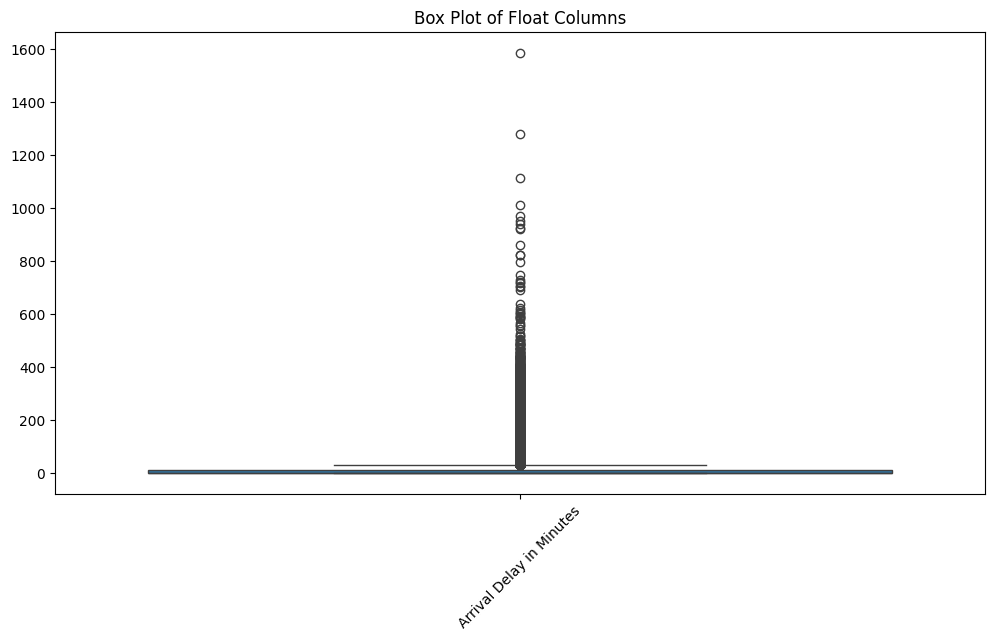

In [9]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=float_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

In [10]:
# Detect Outliers using IQR
outlier_counts = {}
for col in float_cols.columns:
    Q1 = float_cols[col].quantile(0.25)
    Q3 = float_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((float_cols[col] < lower_bound) | (float_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

In [11]:
# Display Outlier Counts
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                          Outlier Count
Arrival Delay in Minutes          17492


In [12]:
# Define function to cap outliers
def cap_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values beyond the bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

In [13]:
# Apply function to replace outliers
float_cols = cap_outliers(float_cols)

In [14]:
# Detect Outliers using IQR
outlier_counts = {}
for col in float_cols.columns:
    Q1 = float_cols[col].quantile(0.25)
    Q3 = float_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((float_cols[col] < lower_bound) | (float_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

In [15]:
# Display Outlier Counts
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                          Outlier Count
Arrival Delay in Minutes              0


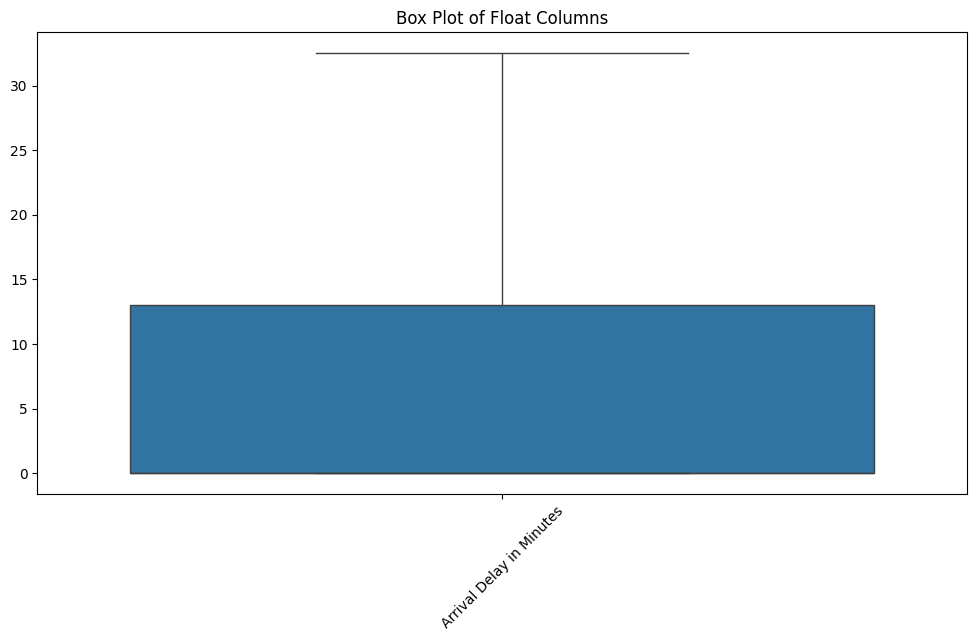

In [16]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=float_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

In [17]:
float_cols.mean()

,0
Arrival Delay in Minutes,7.933391


In [18]:
object_cols.isnull().sum()

,0
Gender,0
Customer Type,0
Type of Travel,0
Class,0
satisfaction,0


In [19]:
float_cols.isnull().sum()

,0
Arrival Delay in Minutes,393


In [20]:
object_cols.mode()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Female,Loyal Customer,Business travel,Business,satisfied


In [21]:
object_cols.fillna(object_cols.mode().iloc[0], inplace=True)

In [22]:
object_cols.isnull().sum()

,0
Gender,0
Customer Type,0
Type of Travel,0
Class,0
satisfaction,0


In [23]:
float_cols.mean()

,0
Arrival Delay in Minutes,7.933391


In [24]:
float_cols.isnull().sum()

,0
Arrival Delay in Minutes,393


In [25]:
# If float_cols was a NumPy array after transformation
colname = list(float_cols.columns)  # Restore original column names

In [26]:
colname

['Arrival Delay in Minutes']

In [27]:
from sklearn.impute import KNNImputer
float_cols# Initialize KNN Imputer (n_neighbors=3 means it will consider 3 nearest neighbors)
imputer = KNNImputer(n_neighbors=5)

In [28]:
# Fit and transform the selected columns
float_cols = imputer.fit_transform(float_cols)

In [29]:
float_cols

array([[ 0. ],
       [32.5],
       [ 0. ],
       ...,
       [32.5],
       [32.5],
       [32.5]])

In [30]:
float_cols = pd.DataFrame(float_cols,columns=colname)  # Convert to DataFrame if needed
float_cols.isnull().sum()

,0
Arrival Delay in Minutes,0


In [31]:
float_cols

,Arrival Delay in Minutes
0,0.0
1,32.5
2,0.0
3,0.0
4,0.0
...,...
129875,0.0
129876,32.5
129877,32.5
129878,32.5


In [32]:
object_cols.isnull().sum()

,0
Gender,0
Customer Type,0
Type of Travel,0
Class,0
satisfaction,0


In [33]:
float_cols.isnull().sum()

,0
Arrival Delay in Minutes,0


In [34]:
float_cols

,Arrival Delay in Minutes
0,0.0
1,32.5
2,0.0
3,0.0
4,0.0
...,...
129875,0.0
129876,32.5
129877,32.5
129878,32.5


In [35]:
object_cols

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Female,Loyal Customer,Personal Travel,Eco,satisfied
1,Male,Loyal Customer,Personal Travel,Business,satisfied
2,Female,Loyal Customer,Personal Travel,Eco,satisfied
3,Female,Loyal Customer,Personal Travel,Eco,satisfied
4,Female,Loyal Customer,Personal Travel,Eco,satisfied
...,...,...,...,...,...
129875,Female,disloyal Customer,Personal Travel,Eco,satisfied
129876,Male,disloyal Customer,Personal Travel,Business,dissatisfied
129877,Male,disloyal Customer,Personal Travel,Eco,dissatisfied
129878,Male,disloyal Customer,Personal Travel,Eco,dissatisfied


In [36]:
dataset=pd.get_dummies(dataset,drop_first=True, dtype=int)

In [ ]:
# # Assuming 'satisfaction' was a categorical column and was one-hot encoded
# # Check the new columns created by get_dummies
# print(dataset.columns)

# # Drop the one-hot encoded columns related to 'satisfaction'
# # Replace 'satisfaction_satisfied', 'satisfaction_neutral or dissatisfied' with actual column names
# X = dataset.drop(columns=['satisfaction_satisfied'])
# y = dataset[['satisfaction_satisfied']] # Choose one of the encoded columns as target
# # If you want a multi class then keep both target variables and change the model selection as well.

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus', 'satisfaction_satisfied'],
      dtype='object')


In [37]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

# Assuming 'satisfaction' was a categorical column and was one-hot encoded
# Check the new columns created by get_dummies
print(dataset.columns)

# Drop the one-hot encoded columns related to 'satisfaction'
# Replace 'satisfaction_satisfied', 'satisfaction_neutral or dissatisfied' with actual column names
X = dataset.drop(columns=['satisfaction_satisfied'])
y = dataset[['satisfaction_satisfied']] # Choose one of the encoded columns as target
# If you want a multi class then keep both target variables and change the model selection as well.

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus', 'satisfaction_satisfied'],
      dtype='object')


In [38]:
# prompt: implement decision tree algorithm on the above dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.9384046812442255
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11675
           1       0.94      0.94      0.94     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [42]:
# prompt: Implement Random forest on the above data set and give accuracy

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100) # You can adjust hyperparameters here

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9577302125038497
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use transform on X_test to avoid data leakage

# Initialize the SVC classifier
svc_clf = SVC(random_state=42)  # You can adjust hyperparameters here

# Train the classifier
svc_clf.fit(X_train, y_train.values.ravel()) # ravel y_train to handle a single column

# Make predictions on the test set
y_pred_svc = svc_clf.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc}")

print(classification_report(y_test, y_pred_svc))

In [ ]:
# prompt: implement SVC on the Above dataset

from sklearn.svm import SVC

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize the SVC classifier
svc_clf = SVC(random_state=42)  # You can adjust hyperparameters here

# Train the classifier
svc_clf.fit(X_train, y_train.values.ravel()) # ravel y_train to handle a single column

# Make predictions on the test set
y_pred_svc = svc_clf.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc}")

print(classification_report(y_test, y_pred_svc))


In [ ]:
# prompt: implement LOgestic regression on the Above dataset

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_clf = LogisticRegression(random_state=42, max_iter=1000) # You can adjust hyperparameters here, increased max_iter

# Train the classifier
logreg_clf.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred_logreg = logreg_clf.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

print(classification_report(y_test, y_pred_logreg))
